In [19]:
!pip install pandas

In [20]:
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [2]:
### 주문 별도 추출 코드/ 간결한 

import requests
import xml.etree.ElementTree as ET
import pandas as pd
import re

# 기본 설정
df = pd.read_csv(r'C:\Users\82102\Downloads\새 폴더 (2)\lawSearch_jh.csv')
OC = 'znaeng110'
target = 'prec'
url = 'http://www.law.go.kr/DRF/lawService.do?'
data_list = []

# 판례 데이터 가져오기
for i in range(len(df)):  # 'df' DataFrame의 길이만큼 반복
    params = {
        'OC': OC,
        'target': target,
        'type': 'XML',
        'ID': df['판례일련번호'].iloc[i]
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        content = ET.fromstring(response.content).findtext('.//판례내용')

        if content:
            # 모든 "【 】" 형식의 텍스트 찾기
            matches = re.findall(r'【(.*?)】\s*(.*?)<br/>', content, re.DOTALL)
            
            # "【주    문】" 부분 별도 추출
            jumun = re.search(r'【주\s*문】\s*<br/>\s*(.*?)(?=<br/>)', content, re.DOTALL)
            
            # 딕셔너리 생성 및 데이터 추가
            data = {col.strip(): val.strip() for col, val in matches}
            if jumun:
                data['주 문'] = jumun.group(1).strip()
            
            data_list.append(data)
        else:
            print(f'판례내용이 없습니다. (ID: {df["판례일련번호"].iloc[i]})')

# DataFrame으로 변환
final_df = pd.DataFrame(data_list)
print(final_df.head())

  재항고인                         원심결정 주    문  \
0       서울고등법원 1985.8.19 자 84로20 결정          
1  NaN                          NaN          
2  NaN                          NaN          
3  NaN                          NaN          
4  NaN                          NaN          

                                              이    유  \
0  형사소송법 제420조 제5호의 "명백한 증거가 새로 발견된 때"라고 함은 재심대상 ...   
1  【범죄사실】피고인 2 주식회사는 인천 남구 주안동 \n          (지번 생략...   
2                                   1. 주의적 청구에 대한 판단   
3                                      1. 손해배상책임의 발생   
4  원고가 1983.6.1.부터 피고회사의 버스운전사로 근무하여 오다가 같은해 8.25...   

                                                 주 문 피 고 인     증거의 요지  \
0                                         재항고를 기각한다.   NaN        NaN   
1  피고인 1을 징역 2년 6월에, \n        피고인 2 주식회사를 벌금 400...        판시 각 사실은,   
2                                     1. 원심판결을 취소한다.   NaN        NaN   
3                              1. 원심판결을 다음과 같이 변경한다.   NaN        NaN   
4                    

In [3]:
final_df.head()

,재항고인,원심결정,주 문,이 유,주 문,피 고 인,증거의 요지,법령의 적용,변호인의 주장에 대한 판단,"원고, 피항소인",...,"원고, 피상고인 겸 원고 등",증 거,"상고인, 피고인 및 검사","원고, 반소피고 및 공소인","피고, 반소원고 및 피공소인","원고, 피공소인, 상고인","피고, 공소인, 피상고인",사 실,"비상, 상고인","피고, 공소인, 상고인"
0,,서울고등법원 1985.8.19 자 84로20 결정,,"형사소송법 제420조 제5호의 ""명백한 증거가 새로 발견된 때""라고 함은 재심대상 ...",재항고를 기각한다.,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,,【범죄사실】피고인 2 주식회사는 인천 남구 주안동 \n (지번 생략...,"피고인 1을 징역 2년 6월에, \n 피고인 2 주식회사를 벌금 400...",,"판시 각 사실은,",피고인 1의 판시 소위는 포괄하여 \n 보건범죄단속에관한특벌조치법 ...,변호인은 피고인들이 판시 유지를 제조하는데 도지사의 식품가공업 허가를 받아야 한다는...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,,1. 주의적 청구에 대한 판단,1. 원심판결을 취소한다.,NaN,NaN,NaN,NaN,주식회사 대우,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,,1. 손해배상책임의 발생,1. 원심판결을 다음과 같이 변경한다.,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,,원고가 1983.6.1.부터 피고회사의 버스운전사로 근무하여 오다가 같은해 8.25...,항소를 기각한다.,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# '주'와 '문'이 포함된 칼럼만 필터링
filtered_df = final_df.filter(like='주').filter(like='문')

# 모든 칼럼을 하나의 칼럼으로 통합
filtered_df['주문'] = filtered_df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# 결과 확인
print(filtered_df[['주문']])

                                                      주문
0                                             재항고를 기각한다.
1       피고인 1을 징역 2년 6월에, \n        피고인 2 주식회사를 벌금 40...
2                                         1. 원심판결을 취소한다.
3                                  1. 원심판결을 다음과 같이 변경한다.
4                                              항소를 기각한다.
...                                                  ...
20073                                          원판결은 파훼함.
20074                                          원판결을 파훼함.
20075                                          원판결을 파훼함.
20076                                          원판결을 파훼함.
20077                                          원판결을 파훼함.

[20078 rows x 1 columns]


In [15]:
#기호제거

data_list = filtered_df['주문']
data_list = [text.replace('\r', '').replace('\n', '').replace('<br/>', '').strip() for text in data_list]
data_list

['재항고를 기각한다.',
 '피고인 1을 징역 2년 6월에,         피고인 2 주식회사를 벌금 400,000,000(4억)원에 각 처한다.',
 '1. 원심판결을 취소한다.',
 '1. 원심판결을 다음과 같이 변경한다.',
 '항소를 기각한다.',
 '원심판결을 파기한다.',
 '원심판결을 파기한다.',
 '1. 피고는         원고 1에게 금 11,599,643원,         원고 2에게 금 500,000원,         원고 3에게 금 300,000원 및 각 이에 대한 1984.5.9.부터 완제일까지 연 5푼의 비율에 의한 각 금원을 지급하라.',
 '원심판결을 파기한다.',
 '피고가 1984.5.17.자로 원고에게 한 양도소득세 금 2,863,500원 및 방위세 금 775,200원의 부과처분을 취소한다.',
 '원판결을 취소한다.',
 '특별항고를 기각한다.',
 '이 사건 소를 기각한다.',
 '원심판결을 파기하고, 사건을 서울고등법원에 환송한다.',
 '원심판결을 파기하고, 사건을 수원지방법원 합의부에 환송한다.',
 '상고를 기각한다.',
 '상고를 기각한다.',
 '상고를 기각한다.',
 '원심판결의 피고 패소부분을 파기하고, 이 부분 사건을 서울고등법원으로 환송한다.',
 '상고를 기각한다.',
 '원심판결의 피고 패소부분중 재산상 손해에 관한 부분을 파기하고, 이 부분 사건을 서울고등법원으로 환송한다.',
 '원심판결을 파기하고, 사건을 전주지방법원 합의부에 환송한다.',
 '원심판결을 파기하고, 사건을 서울고등법원에 환송한다.',
 '원심판결을 파기하고, 사건을 서울고등법원에 환송한다.',
 '원심판결을 파기한다.',
 '상고를 기각한다.',
 '원심판결과 제1심 판결을 모두 파기한다.',
 '원심판결을 파기하고, 사건을 서울고등법원에 환송한다.',
 '원심판결을 파기하고, 사건을 서울고등법원으로 환송한다.',
 '상고를 기각한다.',
 '상고를 기각한다.',
 '상고를 기각한다.',
 '상고를 기각한다.',
 '상고를 

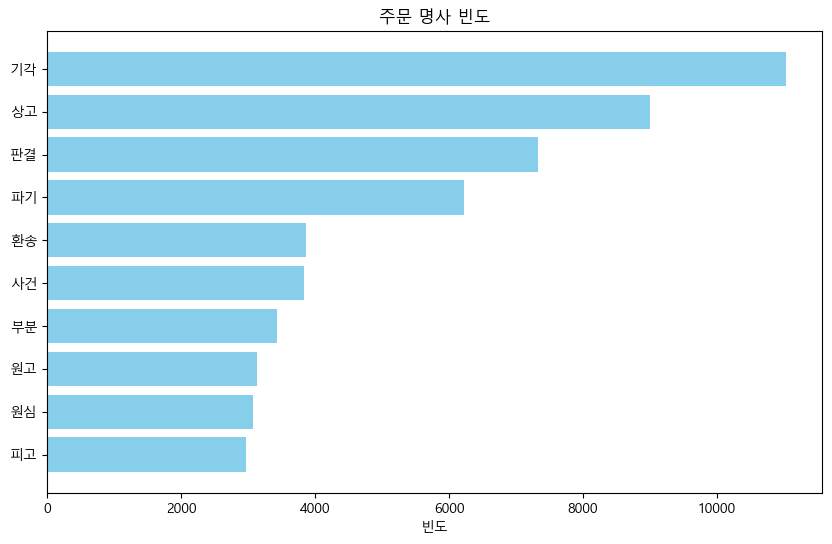

In [21]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from konlpy.tag import Okt

#명사추출
docs_list =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    docs_list.append(' '.join(nouns))


# 명사를 리스트로 결합
all_nouns = ' '.join(docs_list)

# 명사 빈도 세기
noun_counts = Counter(all_nouns.split())

# 데이터프레임으로 변환
df_noun_counts = pd.DataFrame(noun_counts.items(), columns=['noun', 'count'])
df_noun_counts = df_noun_counts.sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_noun_counts['noun'][:10], df_noun_counts['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('주문 명사 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#1-gram
vect = CountVectorizer() 
dtm = vect.fit_transform(docs_list).toarray()
vocab = vect.get_feature_names_out()
df_1gram = pd.DataFrame(dtm, columns=vocab)

#2-gram
vect_2gram = CountVectorizer(ngram_range=(2, 2))
dtm_2gram = vect_2gram.fit_transform(docs_list).toarray()
vocab_2gram = vect_2gram.get_feature_names_out()
df_2gram = pd.DataFrame(dtm_2gram, columns=vocab_2gram)

#3-gram
vect_3gram = CountVectorizer(ngram_range=(3, 3))
dtm_3gram = vect_3gram.fit_transform(docs_list).toarray()
vocab_3gram = vect_3gram.get_feature_names_out()
df_3gram = pd.DataFrame(dtm_3gram, columns=vocab_3gram)

print("1-gram")
print(df_1gram)

print("2-gram")
print(df_2gram)

print("3-gram")
print(df_3gram)

1-gram
       가각  가건물  가격  가공업  가나  가능  가동  가등기  가로  가마니  가산  가산금  가압류  가옥  가운데  \
0       0    0   0    0   0   0   0    0   0    0   0    0    0   0    0   
1       0    0   0    0   0   0   0    0   0    0   0    0    0   0    0   
2       0    0   0    0   0   0   0    0   0    0   0    0    0   0    0   
3       0    0   0    0   0   0   0    0   0    0   0    0    0   0    0   
4       0    0   0    0   0   0   0    0   0    0   0    0    0   0    0   
...    ..  ...  ..  ...  ..  ..  ..  ...  ..  ...  ..  ...  ...  ..  ...   
20073   0    0   0    0   0   0   0    0   0    0   0    0    0   0    0   
20074   0    0   0    0   0   0   0    0   0    0   0    0    0   0    0   
20075   0    0   0    0   0   0   0    0   0    0   0    0    0   0    0   
20076   0    0   0    0   0   0   0    0   0    0   0    0    0   0    0   
20077   0    0   0    0   0   0   0    0   0    0   0    0    0   0    0   

       가정법원  가중  가지  가집행  가집행선고  가처분  가천  각각  각기  각자  각처  각하  간의  간이  간주  간통  \


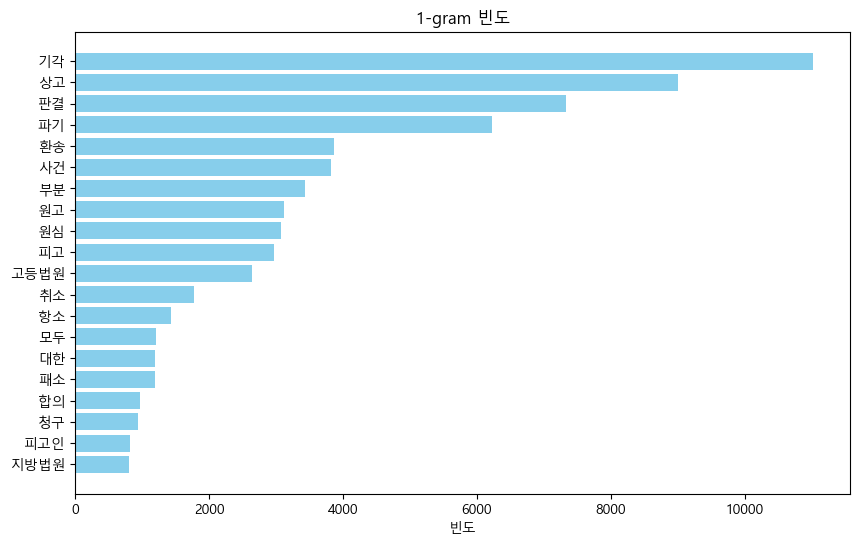

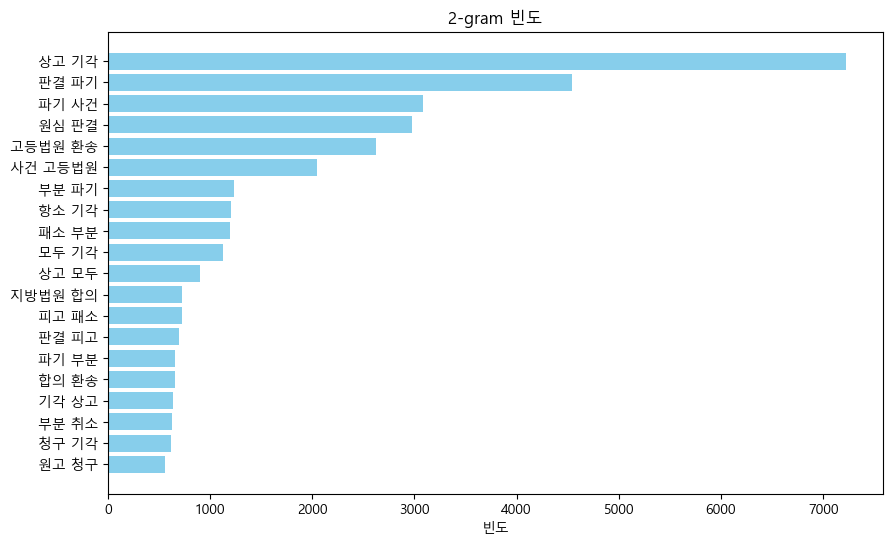

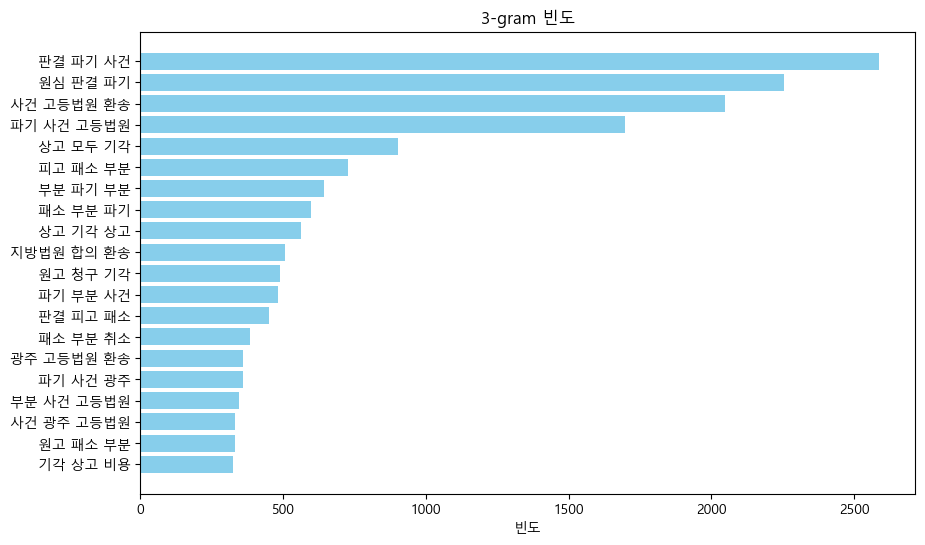

In [23]:
# 빈도수 시각화 함수
def plot_top_n(df, title, n=None):
    # 각 n-gram의 빈도 계산
    freq = df.sum().sort_values(ascending=False).head(n)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(freq.index, freq.values, color='skyblue')
    plt.xlabel('빈도')
    plt.title(title)
    plt.gca().invert_yaxis()  # 빈도순으로
    plt.show()

# 상위 20개 빈도 시각화
plot_top_n(df_1gram, '1-gram 빈도',20)
plot_top_n(df_2gram, '2-gram 빈도',20)
plot_top_n(df_3gram, '3-gram 빈도',20)